# OUR PROPOSAL TO THE PROBLEM

Our approach consists of 3 phases:

1- Pre-Pocessing Phase: We greyscale the image and enhance its quality and contrast.

2- Segmentation Phase: We apply morphological operations on the enhanced greyscale image to remove the background and unwanted parts. In particular, we perform an erosion process using a specific structural element. Then, we convert the image into binary form with the thresholding method.

3- Detection Phase: In the binary image obtained after segmentation, we make the fabric defects clearer using the Wiener filter. We find and mark the largest defect area (ROI) and remove other small areas. In this way, the most important defect stands out clearly.

In [20]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import wiener


## 1- Pre-Processing Phase

In [21]:
image_path = "rawimage\\0076.jpg"

original_image = cv2.imread(image_path)

# Convert the colored image from BGR to RGB for correct color display with Matplotlib
colored_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

grayscale_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# enhance image quality with reducing noice
blurred_image = cv2.GaussianBlur(grayscale_image, (5, 5), 0)

# sharpening
sharpening_kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
sharpened_image = cv2.filter2D(blurred_image, -1, sharpening_kernel)

# enhance contrast with histogram equalization
equalized_image = cv2.equalizeHist(sharpened_image)

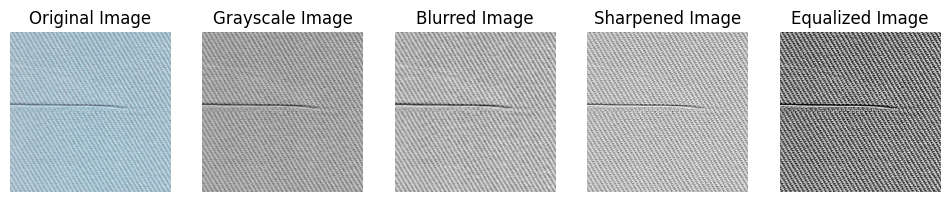

In [22]:
# Show results
plt.figure(figsize=(12, 12))
plt.subplot(1, 5, 1)
plt.imshow(colored_image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 5, 2)
plt.imshow(grayscale_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.subplot(1, 5, 3)
plt.imshow(blurred_image, cmap='gray')
plt.title('Blurred Image')
plt.axis('off')

plt.subplot(1, 5, 4)
plt.imshow(sharpened_image, cmap='gray')
plt.title('Sharpened Image')
plt.axis('off')

plt.subplot(1, 5, 5)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.show()

## 2- Segmentation Phase

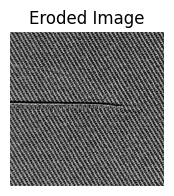

In [23]:
### MORPHOLOGICAL EROSION

# Define a vertical line structuring element
kernel = np.array([[0, 1, 0], 
                   [0, 1, 0], 
                   [0, 1, 0]], dtype=np.uint8)

eroded_image = cv2.erode(equalized_image, kernel)

plt.figure(figsize=(2, 2))
plt.imshow(eroded_image, cmap='gray')
plt.title('Eroded Image')
plt.axis('off')
plt.show()


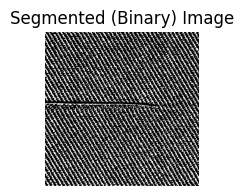

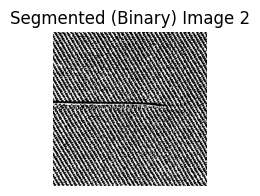

In [24]:
### THRESHOLDING

threshold_value = 0.5 * 255  # Adjusting the threshold value to the scale of [0, 255]
_, binary_image2 = cv2.threshold(eroded_image, threshold_value, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(2, 2))
plt.imshow(binary_image2, cmap='gray')
plt.title('Segmented (Binary) Image')
plt.axis('off')
plt.show()

#_______________________________________________________________________________________________________
#-------------------------------------------------------------------------------------------------------

# Otsu yöntemiyle otomatik eşik değeri belirle
_, binary_image = cv2.threshold(eroded_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Bağlantılı bileşenleri ve istatistikleri bul
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary_image, 8, cv2.CV_32S)

# Küçük nesneleri göz ardı et (örneğin, 4 pikselden küçük olanları)
min_pixel_size = 4
for label in range(1, num_labels):
    if stats[label, cv2.CC_STAT_AREA] < min_pixel_size:
        binary_image[labels == label] = 0

# Sonuçları kaydet veya göster
#cv2.imwrite('segmented_image.jpg', binary_image)
# Alternatif olarak: cv2.imshow('Segmented Image', binary_image) ve cv2.waitKey(0)

plt.figure(figsize=(2, 2))
plt.imshow(binary_image, cmap='gray')
plt.title('Segmented (Binary) Image 2')
plt.axis('off')
plt.show()

In [25]:
# Labeling
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary_image, 8, cv2.CV_32S)

# Ignoring small objects (less than 4 pixels)
min_pixel_size = 4
for label in range(1, num_labels):
    if stats[label, cv2.CC_STAT_AREA] < min_pixel_size:
        binary_image[labels == label] = 0


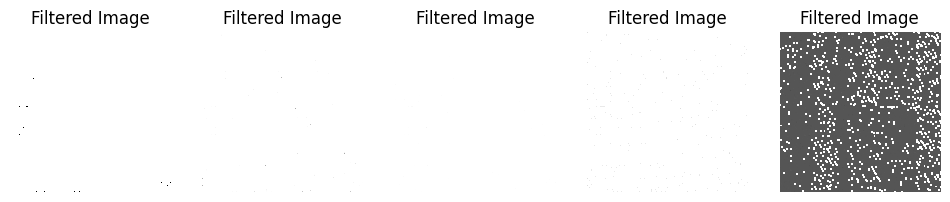

In [26]:
# Apply Wiener Filter
filtered_image = wiener(binary_image, (1, 1))

plt.figure(figsize=(12, 12))
plt.subplot(1, 5, 1)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image')
plt.axis('off')

filtered_image2 = wiener(binary_image, (1, 2))

plt.subplot(1, 5, 2)
plt.imshow(filtered_image2, cmap='gray')
plt.title('Filtered Image')
plt.axis('off')

filtered_image3 = wiener(binary_image, (2, 1))

plt.subplot(1, 5, 3)
plt.imshow(filtered_image3, cmap='gray')
plt.title('Filtered Image')
plt.axis('off')

filtered_image4 = wiener(binary_image, (2, 2))

plt.subplot(1, 5, 4)
plt.imshow(filtered_image4, cmap='gray')
plt.title('Filtered Image')
plt.axis('off')

filtered_image5 = wiener(binary_image, (3, 3))

plt.subplot(1, 5, 5)
plt.imshow(filtered_image5, cmap='gray')
plt.title('Filtered Image')
plt.axis('off')
plt.show()

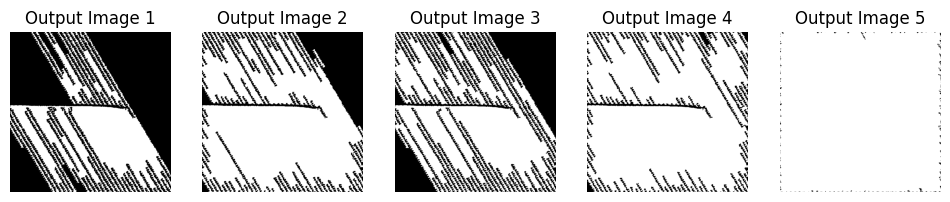

In [27]:
# Wiener filtresi uygulanmış görüntüyü kontrol et
if np.isnan(filtered_image).any() or np.isinf(filtered_image).any():
    # NaN veya inf değerleri sıfırla
    filtered_image = np.nan_to_num(filtered_image)

# Görüntü değer aralığını kontrol et ve 0-255 arasına sınırla
filtered_image = np.clip(filtered_image, 0, 255)

# Veri tipini uint8'e dönüştür
filtered_image_uint8 = filtered_image.astype(np.uint8)


if np.isnan(filtered_image2).any() or np.isinf(filtered_image2).any():
    filtered_image2 = np.nan_to_num(filtered_image2)
filtered_image2 = np.clip(filtered_image2, 0, 255)
filtered_image_uint8 = filtered_image2.astype(np.uint8)

if np.isnan(filtered_image3).any() or np.isinf(filtered_image3).any():
    filtered_image3 = np.nan_to_num(filtered_image3)
filtered_image3 = np.clip(filtered_image3, 0, 255)
filtered_image_uint8 = filtered_image3.astype(np.uint8)

if np.isnan(filtered_image4).any() or np.isinf(filtered_image4).any():
    filtered_image4 = np.nan_to_num(filtered_image4)
filtered_image4 = np.clip(filtered_image4, 0, 255)
filtered_image_uint8 = filtered_image4.astype(np.uint8)

if np.isnan(filtered_image5).any() or np.isinf(filtered_image5).any():
    filtered_image5 = np.nan_to_num(filtered_image5)
filtered_image5 = np.clip(filtered_image5, 0, 255)
filtered_image_uint8 = filtered_image5.astype(np.uint8)


# Find contours (ROIs) in the filtered image
contours, _ = cv2.findContours(filtered_image.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Identify the largest contour (ROI)
largest_contour = max(contours, key=cv2.contourArea)

# Create an empty image to draw the largest ROI
output_image = np.zeros_like(binary_image)
cv2.drawContours(output_image, [largest_contour], -1, (255, 255, 255), thickness=cv2.FILLED)

plt.figure(figsize=(12, 12))
plt.subplot(1, 5, 1)
plt.imshow(output_image, cmap='gray')
plt.title('Output Image 1')
plt.axis('off')

contours, _ = cv2.findContours(filtered_image2.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
largest_contour = max(contours, key=cv2.contourArea)
output_image = np.zeros_like(binary_image)
cv2.drawContours(output_image, [largest_contour], -1, (255, 255, 255), thickness=cv2.FILLED)

plt.subplot(1, 5, 2)
plt.imshow(output_image, cmap='gray')
plt.title('Output Image 2')
plt.axis('off')

contours, _ = cv2.findContours(filtered_image3.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
largest_contour = max(contours, key=cv2.contourArea)
output_image = np.zeros_like(binary_image)
cv2.drawContours(output_image, [largest_contour], -1, (255, 255, 255), thickness=cv2.FILLED)

plt.subplot(1, 5, 3)
plt.imshow(output_image, cmap='gray')
plt.title('Output Image 3')
plt.axis('off')

contours, _ = cv2.findContours(filtered_image4.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
largest_contour = max(contours, key=cv2.contourArea)
output_image = np.zeros_like(binary_image)
cv2.drawContours(output_image, [largest_contour], -1, (255, 255, 255), thickness=cv2.FILLED)

plt.subplot(1, 5, 4)
plt.imshow(output_image, cmap='gray')
plt.title('Output Image 4')
plt.axis('off')

contours, _ = cv2.findContours(filtered_image5.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
largest_contour = max(contours, key=cv2.contourArea)
output_image = np.zeros_like(binary_image)
cv2.drawContours(output_image, [largest_contour], -1, (255, 255, 255), thickness=cv2.FILLED)

plt.subplot(1, 5, 5)
plt.imshow(output_image, cmap='gray')
plt.title('Output Image 5')
plt.axis('off')

plt.show()

## All Results

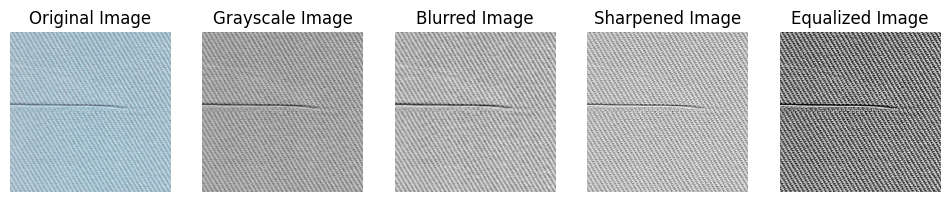

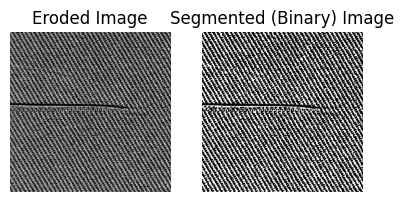

'\nplt.subplot(1, 5, 3)\nplt.imshow(output_image, cmap=\'gray\')\nplt.title("Detected Fabric Defect")\nplt.axis(\'off\')\n\n# plt.subplots_adjust(hspace=0)\n'

In [28]:
plt.figure(figsize=(12, 12))
plt.subplot(1, 5, 1)
plt.imshow(colored_image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 5, 2)
plt.imshow(grayscale_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.subplot(1, 5, 3)
plt.imshow(blurred_image, cmap='gray')
plt.title('Blurred Image')
plt.axis('off')

plt.subplot(1, 5, 4)
plt.imshow(sharpened_image, cmap='gray')
plt.title('Sharpened Image')
plt.axis('off')

plt.subplot(1, 5, 5)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.show()

plt.figure(figsize=(12, 12))
plt.subplot(1, 5, 1)
plt.imshow(eroded_image, cmap='gray')
plt.title('Eroded Image')
plt.axis('off')

plt.subplot(1, 5, 2)
plt.imshow(binary_image, cmap='gray')
plt.title("Segmented (Binary) Image")
plt.axis('off')
plt.show()

"""
plt.subplot(1, 5, 3)
plt.imshow(output_image, cmap='gray')
plt.title("Detected Fabric Defect")
plt.axis('off')

# plt.subplots_adjust(hspace=0)
"""
